In [1]:
import pandas as pd 
import numpy as np
import yfinance
from IPython.display import HTML
import random
#from ipynb.fs.full.Functions1 import hide_toggle
#from operator import itemgetter 
import matplotlib.dates as mpl_dates
import matplotlib.pyplot as plt
from matplotlib import gridspec
%matplotlib inline
#from mpl_finance import candlestick_ohlc
from mplfinance.original_flavor import candlestick_ohlc
import pandas_datareader as pdr
import datetime as dt
import talib
from itertools import compress
#from ipynb.fs.full.Hide import hide_toggle # this function has to be in the same directory!
# pip install finta!!! the only site that has inverse fisher transform!


In [2]:
symbol ="AMD"
num_name= symbol.split(' ') 
data_frames_separate = []
for i in num_name:
        ticker = yfinance.Ticker(i)
        data=ticker.history(interval='1d',start="2018-9-01",end="2019-04-05")
        data['Date'] = pd.to_datetime(data.index) # just to crate another column for date!!!
        data['Date'] = data['Date'].apply(mpl_dates.date2num)
        data = data.loc[:,['Date', 'Open', 'High', 'Low', 'Close']]
        ohlc_data= data.loc[:,['Date', 'Open', 'High', 'Low', 'Close']].values
        data_frames_separate.append(data)

data_frames_separate[0]

,Date,Open,High,Low,Close
Date,,,,,
2018-08-31,17774.0,24.889999,25.240000,24.719999,25.170000
2018-09-04,17778.0,25.620001,28.110001,25.570000,28.059999
2018-09-05,17779.0,29.410000,29.940001,26.840000,28.510000
2018-09-06,17780.0,28.120001,28.580000,27.190001,27.840000
2018-09-07,17781.0,26.959999,28.270000,26.799999,27.379999
...,...,...,...,...,...
2019-03-29,17984.0,25.580000,25.730000,25.250000,25.520000
2019-04-01,17987.0,26.420000,26.559999,25.830000,26.360001
2019-04-02,17988.0,26.510000,26.799999,26.090000,26.750000


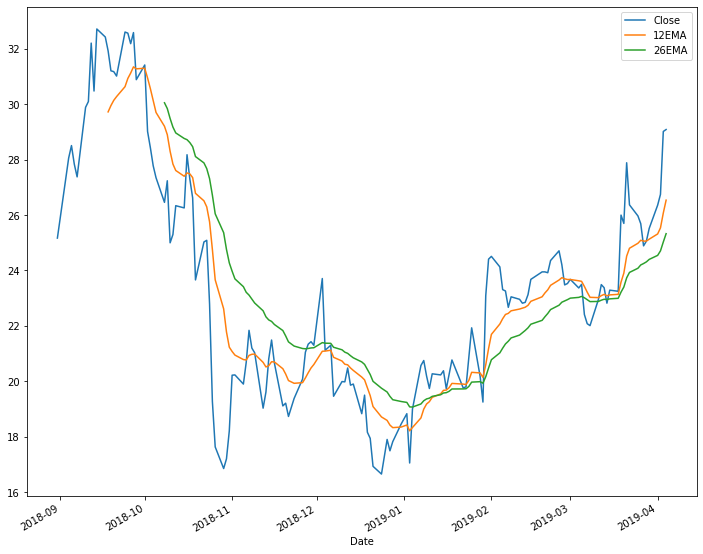

In [7]:
data_frames_separate[0]['12EMA'] = talib.EMA(data_frames_separate[0]['Close'], timeperiod = 12)
data_frames_separate[0]['26EMA'] = talib.EMA(data_frames_separate[0]['Close'], timeperiod = 26)
data_frames_separate[0][['Close','12EMA','26EMA']].plot(figsize=(12,10))
plt.show()